In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
import seaborn as sns
sns.set()
sns.set(color_codes=True)
sns.set(font_scale=2)
# sns.set_style(style='white')
sns.set_style(style='whitegrid')
palette = sns.color_palette()
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'

import numpy as np
from scipy.stats import spearmanr
import os

from experiments.subset_influence import SubsetInfluenceLogreg
from experiments.credit_assignment import CreditAssignment
from experiments.data_valuation import DataValuation
from experiments.counterexamples import Counterexamples

/u/scr/kaiang/influence-release/experiments/credit_assignment.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/u/nlp/packages/anaconda2/envs/tf-kaiang/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/u/nlp/packages/anaconda2/envs/tf-kaiang/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/juice/u/nlp/packages/anaconda2/envs/tf-kaiang/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/u/nlp/packages/anaconda2/envs/tf-kaiang/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/u/nlp/pa

In [3]:
# Get the plots folder within the script directory
PLOT_DIR = os.path.abspath(os.path.join(os.path.abspath('.'), 'plots'))
if not os.path.exists(PLOT_DIR):
    os.makedirs(PLOT_DIR)
print(PLOT_DIR)

/juice/scr/scr106/scr/kaiang/influence-release/scripts/plots


In [4]:
out_dir = '/u/nlp/influence/output_arxiv/'

In [5]:
dataset_ids_to_plot = ['hospital', 'spam', 'dogfish', 'reduced_cdr', 'mnist']
dataset_id_to_name = {
    'hospital': 'Diabetes',
    'spam': 'Enron',
    'dogfish': 'Dogfish',
    'mnist_small': 'MNIST (small)',
    'mnist': 'MNIST',
    'animals': 'ImageNet',
    'reduced_cdr': 'CDR',
}
dataset_id_to_run_id = {
    'animals': 'animals_ihvp-cg_seed-0_sizes-0.0025-0.25_num-100',
    'dogfish': 'dogfish_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-100',
    'hospital': 'hospital_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-100',
    'mnist': 'mnist_ihvp-cg_seed-0_sizes-0.0025-0.25_num-100',
    'mnist_small': 'mnist_small_ihvp-cg_seed-0_sizes-0.0025-0.25_num-100',
    'spam': 'spam_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-100',
    'reduced_cdr': 'reduced_cdr_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-100',
}
dataset_id_to_fixed_test_idx = {
    'hospital': 2,
    'spam': 2,
    'dogfish': 2,
    'mnist_small': 2,
    'mnist': 1,
    'reduced_cdr': 2,
}
dataset_id_to_fixed_test_idx_median = {
    'hospital': 3,
    'spam': 3,
    'dogfish': 3,
    'mnist_small': 5,
    'mnist': 3,
    'reduced_cdr': 5,
}

# Where are the fixed test points?

In [6]:
for dataset_id, run_id in dataset_id_to_run_id.items():
    _out_dir = out_dir
    E = SubsetInfluenceLogreg.load_run(run_id, out_dir=_out_dir,
                                       phase_indices=[1, 2], verbose=False)
    
    fixed_test, initial_test_losses = E.R['fixed_test'], E.R['initial_test_losses']
    print(dataset_id)
    print('Fixed test: {}'.format(fixed_test))
    N_test = len(initial_test_losses)
    test_order = np.argsort(initial_test_losses)
    
    for test_idx, test_loss in zip(fixed_test, initial_test_losses[fixed_test]):
        rank = np.nonzero(test_order == test_idx)[0][0] + 1
        print('Fixed test idx {} has loss {} with rank {} out of {}'.format(
            test_idx, test_loss, rank, N_test))

animals
Fixed test: [ 684  850 1492 2380 1539 1267]
Fixed test idx 684 has loss 11.0248708725 with rank 2998 out of 3000
Fixed test idx 850 has loss 11.9371509552 with rank 2999 out of 3000
Fixed test idx 1492 has loss 12.3445482254 with rank 3000 out of 3000
Fixed test idx 2380 has loss 0.280978560448 with rank 2700 out of 3000
Fixed test idx 1539 has loss 0.00412613060325 with rank 1666 out of 3000
Fixed test idx 1267 has loss 0.000783851428423 with rank 899 out of 3000
Retrieving reduced cdr.
Loaded reduced cdr.
reduced_cdr
Fixed test: [2702 1756 1755 1115 4039 1155]
Fixed test idx 2702 has loss 2.40747857094 with rank 4099 out of 4101
Fixed test idx 1756 has loss 2.50641751289 with rank 4100 out of 4101
Fixed test idx 1755 has loss 2.64417529106 with rank 4101 out of 4101
Fixed test idx 1115 has loss 0.549080550671 with rank 2231 out of 4101
Fixed test idx 4039 has loss 0.353321909904 with rank 935 out of 4101
Fixed test idx 1155 has loss 0.828286528587 with rank 3134 out of 4101
s

# Subset coloring

In [7]:
subset_tag_color_order = ['pos_tail_test', 'neg_tail_test',
                    'feature_window',
                    'same_features', 'same_grad',
                    'random', 'random_same_class']
subset_tag_order = ['feature_window',
                    'same_features', 'same_grad',
                    'random_same_class', 'random',
                    'pos_tail_test', 'neg_tail_test']
subset_tag_legend = {
    'pos_tail_test': 'Large positive test infl.',
    'neg_tail_test': 'Large negative test infl.',
    'feature_window': 'Shared feature value',
    'same_grad': 'Gradient clustering',
    'same_features': 'Feature clustering',
    'random': 'Random',
    'random_same_class': 'Random within class',
}

In [8]:
subset_colors = plt.cm.tab10(np.arange(len(subset_tag_color_order)))
tag_to_color = dict(zip(subset_tag_color_order, subset_colors))

# Figure 1: Dataset Comparison

In [9]:
def plot_group_correlation(ax,
                           x,
                           y,
                           alpha=1,
                           size=5,
                           colors=None,
                           legend=True,
                           balanced=False,
                           equal=True,
                           shrinkx=1,
                           shrinky=1,
                           shrinkx_anchor='min',
                           shrinky_anchor='min',
                           padx=0.05,
                           pady=0.05,
                           diagonal=True,
                           tickbins=4,
                           show_x_axis=False,
                           get_spearman=True,
                           scientific=True):
    # Compute data bounds
    minX, maxX = np.min(x), np.max(x)
    minY, maxY = np.min(y), np.max(y)

    if equal:
        minX = minY = min(minX, minY)
        maxX = maxY = max(maxX, maxY)

    if balanced:
        maxX = max(np.abs(minX), np.abs(maxX))
        minX = -maxX
        maxY = max(np.abs(minY), np.abs(maxY))
        minY = -maxY
    
    def shrink(minV, maxV, shrink_factor, shrink_anchor):
        if shrink_anchor == 'min':
            maxV = minV + shrink_factor * (maxV - minV)
        elif shrink_anchor == 'max':
            minV = maxV + shrink_factor * (minV - maxV)
        elif shrink_anchor == 'mid':
            mid, half = (minV + maxV) / 2, (maxV - minV) / 2
            minV, maxV = mid - shrink_factor * half, mid + shrink_factor * half
        return minV, maxV
    
    minX, maxX = shrink(minX, maxX, shrinkx, shrinkx_anchor)
    minY, maxY = shrink(minY, maxY, shrinky, shrinky_anchor)

    # Expand bounds
    padX = padx * (maxX - minX)
    padY = pady * (maxY - minY)
    minW, maxW = min(minX, minY), max(maxX, maxY)
    padW = max(padX, padY)

    # Plot x=y
    if diagonal:
        ax.plot([minW - padW, maxW + padW],
                [minW - padW, maxW + padW],
                color='grey', alpha=0.8, linewidth=2)
    for spine in ('left', 'right', 'top', 'bottom'):
        ax.spines[spine].set_color('grey')
        ax.spines[spine].set_alpha(0.8)
    
    # Plot y=0
    if show_x_axis:
        ax.plot([minW - padW, maxW + padW],
                [0, 0],
                color='grey', alpha=0.8, linewidth=2)

    # Plot points
    ax.scatter(x, y, color=colors, alpha=alpha, s=size)
    ax.set_xlim([minX - padX, maxX + padX])
    ax.set_ylim([minY - padY, maxY + padY])
    
    if scientific:
        ax.ticklabel_format(style='scientific', scilimits=(-3,3), useMathText=True)
    else:
        ax.ticklabel_format(useMathText=True)
    ax.locator_params(nbins=tickbins)
    
    if get_spearman:
        return spearmanr(x,y)[0]

In [10]:
def set_splines_grey(ax):
    for spine in ('left', 'right', 'top', 'bottom'):
        ax.spines[spine].set_color('grey')
        ax.spines[spine].set_alpha(0.8)

In [11]:
def replace_y_ticks_with_min_max(ax, ytick_pad):
    ymin, ymax = ax.get_ylim()
    w = ymax - ymin
    ymin, ymax = ymin + w * ytick_pad, ymax - w * ytick_pad
    def notate(v):
        dec, scale = '{:.2e}'.format(v).split('e')
        scale = int(scale)
        rounded = float(dec) * (10 ** scale)
        if scale == 0: return '$\\mathdefault{{{:.2f}}}$'.format(v), rounded
        elif scale == 1: return '$\\mathdefault{{{:.1f}}}$'.format(v), rounded
        elif scale == 2: return '$\\mathdefault{{{:.0f}}}$'.format(v), rounded
        else: return '$\\mathdefault{{{} \\times 10^{{{}}}}}$'.format(dec, scale), rounded
    
    ymin_text, ymin = notate(ymin)
    ymax_text, ymax = notate(ymax)

    ax.set_yticks([ymin, ymax])
    for label in ax.get_yticklabels():
        label.set_visible(False)
    ax.yaxis.offsetText.set_visible(False)
    
    ax.annotate(ymin_text, fontsize=20, xy=(1, 0), xycoords='axes fraction',
                xytext=(-10, 5), textcoords='offset points',
                horizontalalignment='right', verticalalignment='bottom')
    ax.annotate(ymax_text, fontsize=20, xy=(1, 1), xycoords='axes fraction',
                xytext=(-10, -5), textcoords='offset points',
                horizontalalignment='right', verticalalignment='top')

In [12]:
def simplify_axis_ticks(ax, ytick_pad=0.07):
    #replace_y_ticks_with_min_max(ax, ytick_pad=ytick_pad)
    ax.set_yticks([])
    ax.grid(False)
    ax.tick_params(axis='x', bottom=True, direction='in', labelsize=20)
    ax.tick_params(axis='y', right=True, direction='in')

In [13]:
def warn_if_hidden(ax, x, y, count_hidden=True):
    xmin, xmax = np.min(x), np.max(x)
    ymin, ymax = np.min(y), np.max(y)
    xlmin, xlmax = ax.get_xlim()
    ylmin, ylmax = ax.get_ylim()
    
    EPS = 1e-8
    if xmax > xlmax + EPS:
        ax.spines['right'].set_color('red')
        if count_hidden:
            num_outside = np.sum(x > xlmax + EPS).astype(np.int)
            ax.annotate('{} hidden'.format(num_outside), fontsize=18,
                        color='red',
                        xy=(1, 0.5), xycoords='axes fraction',
                        xytext=(10, 0), textcoords='offset points',
                        rotation=90, horizontalalignment='left', verticalalignment='center')
    if xmin < xlmin - EPS:
        ax.spines['left'].set_color('red')
    if ymax > ylmax + EPS:
        ax.spines['top'].set_color('red')
    if ymin < ylmin - EPS:
        ax.spines['bottom'].set_color('red')

In [14]:
def hide_axis(ax):
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

In [15]:
def tail_first(subset_tags):
    tail_indices = [i for i, tag in enumerate(subset_tags) if tag.find('tail') != -1]
    rest = [i for i, tag in enumerate(subset_tags) if tag.find('tail') == -1]
    np.random.shuffle(tail_indices)
    np.random.shuffle(rest)
    order = tail_indices + rest
    return order, np.array(subset_tags)[order]

Retrieving reduced cdr.
Loaded reduced cdr.
Extracting /u/nlp/influence/data/mnist/train-images-idx3-ubyte.gz
Extracting /u/nlp/influence/data/mnist/train-labels-idx1-ubyte.gz
Extracting /u/nlp/influence/data/mnist/t10k-images-idx3-ubyte.gz
Extracting /u/nlp/influence/data/mnist/t10k-labels-idx1-ubyte.gz
[[0.99860741 0.88605002 0.97574151 0.99491207 0.        ]
 [0.99860608 0.88605002 0.97574151 0.99491207 0.99639944]
 [0.99814705 0.88783414 0.98022318 0.99247232 0.99356572]]


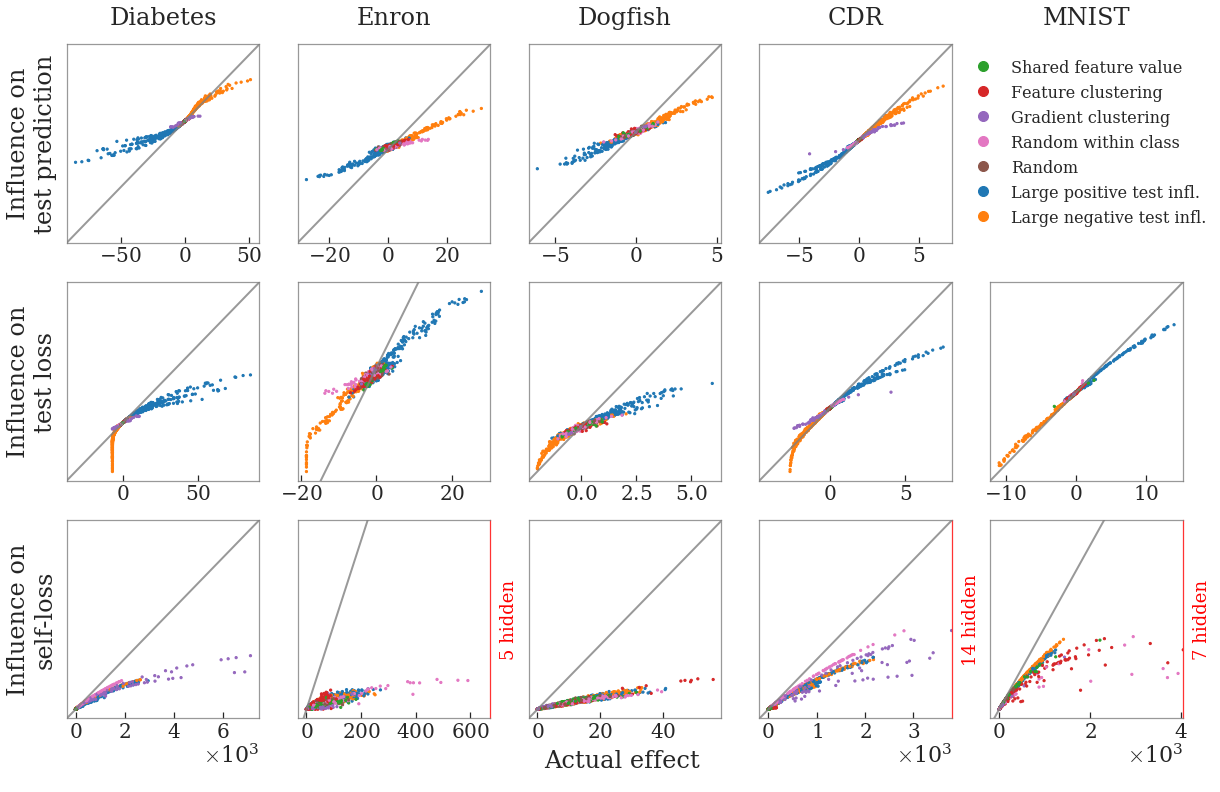

In [16]:
# test margin, test loss, self loss
rows = 3
cols = len(dataset_ids_to_plot)
cell_height, cell_width = 4, 4

fig, ax = plt.subplots(rows, cols,
                       figsize=(cols * cell_width, rows * cell_height))
spearmans = np.zeros((rows,cols),dtype=float)

for c, dataset_id in enumerate(dataset_ids_to_plot):
    run_id = dataset_id_to_run_id[dataset_id]
    _out_dir = out_dir
    E = SubsetInfluenceLogreg.load_run(run_id, out_dir=_out_dir,
                                       phase_indices=[2, 5, 7, 8],
                                       verbose=False)
    
    subset_tags = E.get_simple_subset_tags()
    order, subset_tags = tail_first(subset_tags)
    colors = np.array([tag_to_color[tag] for tag in subset_tags])
    
    fixed_test_idx = dataset_id_to_fixed_test_idx[dataset_id]
    
    if dataset_id not in ('mnist', 'mnist_small'):
        # test margin
        x = E.R['subset_fixed_test_actl_margin_infl'][:, fixed_test_idx][order]
        y = E.R['subset_fixed_test_pred_margin_infl'][:, fixed_test_idx][order]
        spearmans[0][c] = plot_group_correlation(ax[0][c], x, y, colors=colors)
        warn_if_hidden(ax[0][c], x, y)

    # test loss
    x = E.R['subset_fixed_test_actl_infl'][:, fixed_test_idx][order]
    y = E.R['subset_fixed_test_pred_infl'][:, fixed_test_idx][order]
    if dataset_id == 'spam':
        spearmans[1][c] = plot_group_correlation(ax[1][c], x, y, colors=colors,
                               equal=False)
                               #shrinkx=0.1)
    else:
        spearmans[1][c] = plot_group_correlation(ax[1][c], x, y, colors=colors)
    warn_if_hidden(ax[1][c], x, y)
    
    # self loss
    x = E.R['subset_self_actl_infl'][:][order]
    y = E.R['subset_self_pred_infl'][:][order]
    if dataset_id == 'spam':
        spearmans[2][c] = plot_group_correlation(ax[2][c], x, y, colors=colors,
                               shrinkx=0.6,
                               shrinky=0.2,
                               equal=True)
    elif dataset_id == 'mnist':
        spearmans[2][c] = plot_group_correlation(ax[2][c], x, y, colors=colors,
                               shrinkx=0.07,
                               shrinky=0.04,
                               equal=True)
    elif dataset_id == 'dogfish':
        # TODO: fix the colliding ticks at the bottom in a less gross way
        spearmans[2][c] = plot_group_correlation(ax[2][c], x, y, colors=colors)
        xmin, xmax = ax[2][c].get_xlim()
        ax[2][c].set_xlim([xmin, xmax - 0.3])
    elif dataset_id == 'reduced_cdr':
        spearmans[2][c] = plot_group_correlation(ax[2][c], x, y, colors=colors,
                               shrinkx=0.35,
                               shrinky=0.35)
    else:
        spearmans[2][c] = plot_group_correlation(ax[2][c], x, y, colors=colors)
    warn_if_hidden(ax[2][c], x, y)

# Hide the mnist test margin square
hide_axis(ax[0][-1])

# show min/max for y axis instead of ticks
for r in range(rows):
    for c in range(cols):
        if r == 0 and c == cols - 1: continue
        simplify_axis_ticks(ax[r][c])

# Y labels on the left
ax[0][0].set_ylabel('Influence on\ntest prediction', labelpad=10)
ax[1][0].set_ylabel('Influence on\ntest loss', labelpad=10)
ax[2][0].set_ylabel('Influence on\nself-loss', labelpad=10)

# X labels for the dataset names on top
for c, dataset_id in enumerate(dataset_ids_to_plot):
    name = dataset_id_to_name[dataset_id]
    ax[0][c].xaxis.set_label_position('top')
    ax[0][c].set_xlabel(name, labelpad=20)

# X label at bottom
ax[2][0].annotate('Actual effect', fontsize=24,
                  xy=(0.51, 0), xycoords='figure fraction',
                  xytext=(0, 20), textcoords='offset points',
                  horizontalalignment='center', verticalalignment='bottom')

# Put a legend on the top right
legend_elements = [ Line2D([0], [0], linewidth=0, marker='o', markersize=10,
                           color=tag_to_color[tag],
                           label=subset_tag_legend[tag])
                    for tag in subset_tag_order ]
ax[0][-1].legend(
    handles=legend_elements,
    loc='upper center', ncol=1, prop={'size': 16},
    frameon=False)

fig.subplots_adjust(wspace=0.2, hspace=0.2, bottom=0.1)
print(spearmans)

In [17]:
fig.savefig(
    os.path.join(PLOT_DIR, 'paper-fig1.pdf'), 
    dpi=300, bbox_inches='tight')

# Figure 2: Newton pparam vs Actual

In [18]:
dataset_ids_to_plot_newton = ['hospital', 'spam', 'dogfish', 'reduced_cdr']
#dataset_ids_to_plot_newton = dataset_ids_to_plot

Retrieving reduced cdr.
Loaded reduced cdr.
[[0.99867449 0.99489684 0.99756589 0.99125161]]


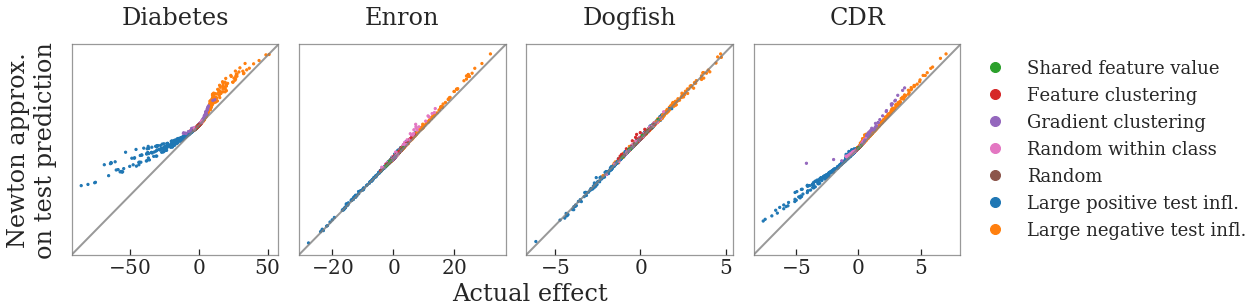

In [19]:
rows = 1
cols = len(dataset_ids_to_plot_newton)+1
cell_height, cell_width = 4, 4
spearmans = np.zeros((rows,cols-1),dtype=float)

fig, ax = plt.subplots(rows, cols,
                       figsize=(cols * cell_width, rows * cell_height),
                       squeeze=False)

for c, dataset_id in enumerate(dataset_ids_to_plot_newton):
    run_id = dataset_id_to_run_id[dataset_id]
    _out_dir = out_dir
    E = SubsetInfluenceLogreg.load_run(run_id, out_dir=_out_dir,
                                       phase_indices=[2, 5, 7, 8, 14],
                                       verbose=False)
    
    subset_tags = E.get_simple_subset_tags()
    order, subset_tags = tail_first(subset_tags)
    colors = np.array([tag_to_color[tag] for tag in subset_tags])
    
    fixed_test_idx = dataset_id_to_fixed_test_idx[dataset_id]
    
    if 'subset_fixed_test_nparam_margin_infl' in E.R:
        x = E.R['subset_fixed_test_actl_margin_infl'][:, fixed_test_idx][order]
        y = E.R['subset_fixed_test_nparam_margin_infl'][:, fixed_test_idx][order]
        spearmans[0][c] = plot_group_correlation(ax[0][c], x, y, colors=colors)
        warn_if_hidden(ax[0][c], x, y)

# Hide the mnist test margin square
hide_axis(ax[0][-1])

# show min/max for y axis instead of ticks
for r in range(rows):
    for c in range(cols):
        if r == 0 and c == cols - 1: continue
        simplify_axis_ticks(ax[r][c])

# Y labels on the left
ax[0][0].set_ylabel('Newton approx.\non test prediction', labelpad=15)

# X labels for the dataset names on top
for c, dataset_id in enumerate(dataset_ids_to_plot[:-1]):
    name = dataset_id_to_name[dataset_id]
    ax[0][c].xaxis.set_label_position('top')
    ax[0][c].set_xlabel(name, labelpad=20)

# X label at bottom
ax[0][0].annotate('Actual effect', fontsize=24,
                  xy=(0.42, 0), xycoords='figure fraction',
                  xytext=(0, 0), textcoords='offset points',
                  horizontalalignment='center', verticalalignment='bottom')

# Put a legend on the top right
legend_elements = [ Line2D([0], [0], linewidth=0, marker='o', markersize=10,
                           color=tag_to_color[tag],
                           label=subset_tag_legend[tag])
                    for tag in subset_tag_order ]
ax[0][-1].legend(
    handles=legend_elements,
    loc='center left', bbox_to_anchor=(-0.1, 0.5),
    ncol=1, prop={'size': 18},
    frameon=False)

fig.subplots_adjust(wspace=0.1, bottom=0.15)
print(spearmans)

In [20]:
fig.savefig(
    os.path.join(PLOT_DIR, 'paper-fig2.pdf'), 
    dpi=300, bbox_inches='tight')

# Fig 3: Regularization

In [21]:
dataset_ids_to_plot_reg = ['hospital', 'spam', 'dogfish', 'mnist_small']
dataset_id_to_reg_run_ids = {
    'hospital': [
        "hospital_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-0.0001",
        "hospital_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-0.001",
        "hospital_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-0.01",
        "hospital_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-0.1",
        "hospital_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-1.0",
        "hospital_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-10.0",
        "hospital_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-100.0",
    ],
    'spam': [
        "spam_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-1e-07",
        "spam_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-1e-06",
        "spam_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-1e-05",
        "spam_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-0.0001",
        "spam_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-0.001",
        "spam_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-0.01",
        "spam_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-0.1",
    ],
    'dogfish': [
        "dogfish_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-1e-07",
        "dogfish_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-1e-06",
        "dogfish_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-1e-05",
        "dogfish_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-0.0001",
        "dogfish_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-0.001",
        "dogfish_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-0.01",
        "dogfish_ihvp-explicit_seed-0_sizes-0.0025-0.25_num-10_rel-reg-0.1",
    ],
    'mnist_small': [
        "mnist_small_ihvp-cg_seed-0_sizes-0.0025-0.25_num-10_rel-reg-1e-07",
        "mnist_small_ihvp-cg_seed-0_sizes-0.0025-0.25_num-10_rel-reg-1e-06",
        "mnist_small_ihvp-cg_seed-0_sizes-0.0025-0.25_num-10_rel-reg-1e-05",
        "mnist_small_ihvp-cg_seed-0_sizes-0.0025-0.25_num-10_rel-reg-0.0001",
        "mnist_small_ihvp-cg_seed-0_sizes-0.0025-0.25_num-10_rel-reg-0.001",
        "mnist_small_ihvp-cg_seed-0_sizes-0.0025-0.25_num-10_rel-reg-0.01",
        "mnist_small_ihvp-cg_seed-0_sizes-0.0025-0.25_num-10_rel-reg-0.1",
    ],
}

In [22]:
def get_spearmans(x, y, markers, standard_markers):
    EPS=1e-8
    ans = np.zeros_like(standard_markers)
    unique, indices = np.unique(markers, return_inverse=True)
    val_to_index = {}
    for val in unique:
        val_to_index[val] = np.intersect1d(np.where(standard_markers - EPS <= val)[0],\
                                      np.where(val <= standard_markers + EPS)[0])[0]
    for i in range(len(unique)):
        where = np.where(indices == i)[0]
        ans[val_to_index[unique[i]]] = spearmanr(x[where], y[where])[0]
    return ans

In [23]:
run_id = dataset_id_to_reg_run_ids['spam'][2]
E = SubsetInfluenceLogreg.load_run(run_id, out_dir=out_dir,
                                           phase_indices=[0, 7, 8],
                                   verbose=False)

In [24]:
actl = E.R['subset_fixed_test_actl_infl'][:, 2]
print(np.min(actl), np.max(actl))

(-42.59681, 51.914955)


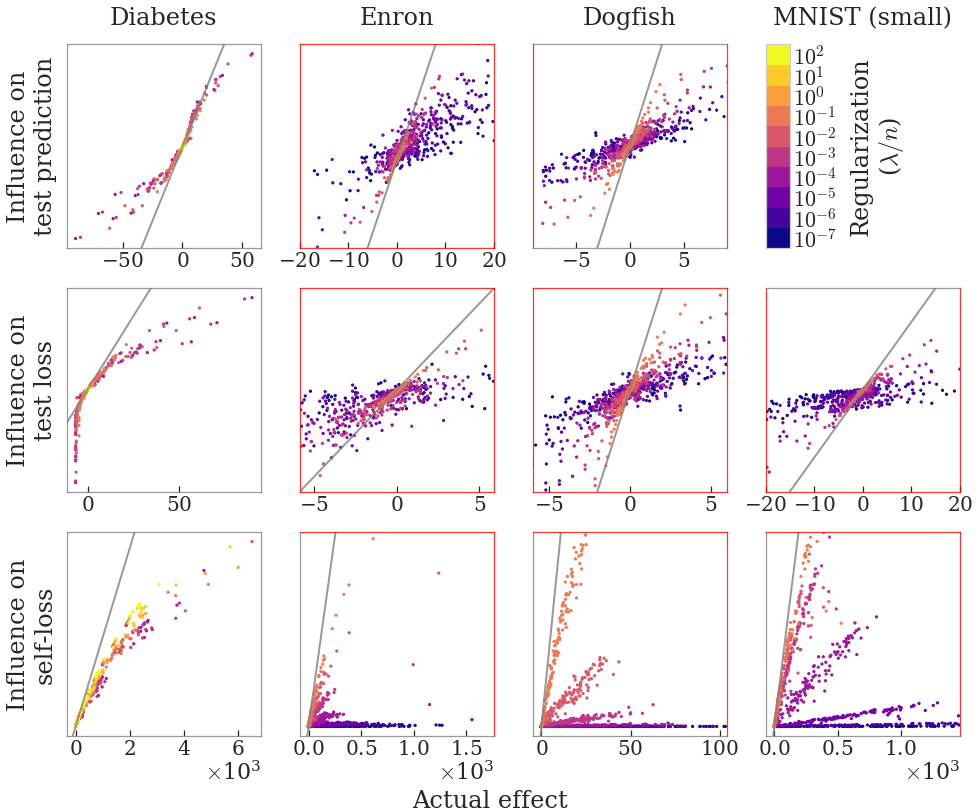

In [25]:
rows = 3
cols = len(dataset_ids_to_plot_reg)
cell_height, cell_width = 4, 4

widths = [cell_width] * cols
heights = [cell_height] * rows
gs_kw = dict(width_ratios=widths, height_ratios=heights)
fig, ax = plt.subplots(ncols=len(widths), nrows=len(heights),
                       gridspec_kw=gs_kw, squeeze=False,
                       figsize=(sum(widths), sum(heights)))

spearmans = np.zeros((rows,cols,10),dtype=float)

cmap = plt.get_cmap('plasma', 10)
norm = mpl.colors.Normalize(vmin=-7 - 0.5, vmax=2 + 0.5)

for c, dataset_id in enumerate(dataset_ids_to_plot_reg):
    run_ids = dataset_id_to_reg_run_ids[dataset_id]
    fixed_test_idx = dataset_id_to_fixed_test_idx[dataset_id]
    
    runs = []
    for run_id in run_ids:
        E = SubsetInfluenceLogreg.load_run(run_id, out_dir=out_dir,
                                           phase_indices=[0, 7, 8],
                                           verbose=False)
        actl = E.R['subset_fixed_test_actl_infl'][:, fixed_test_idx]
        pred = E.R['subset_fixed_test_pred_infl'][:, fixed_test_idx]
        if 'subset_fixed_test_actl_margin_infl' in E.R:
            actl_margin = E.R['subset_fixed_test_actl_margin_infl'][:, fixed_test_idx]
            pred_margin = E.R['subset_fixed_test_pred_margin_infl'][:, fixed_test_idx]
        else:
            # dummy for stacking
            actl_margin = np.zeros((0,))
            pred_margin = np.zeros((0,))
        actl_self = E.R['subset_self_actl_infl']
        pred_self = E.R['subset_self_pred_infl']
        l2_reg = E.R['cv_l2_reg'] / E.num_train
        runs.append((actl, pred, actl_margin, pred_margin, actl_self, pred_self,
                     np.full(actl.shape, l2_reg)))
    actl, pred, actl_margin, pred_margin, actl_self, pred_self, l2_regs = tuple(map(np.hstack, zip(*runs)))
    colors = cmap(norm(np.log10(l2_regs)))
    
    std_l2_regs = np.logspace(-7,2,10)
    
    if dataset_id != 'mnist_small':
        if dataset_id == 'hospital':
            plot_group_correlation(ax[0][c], actl_margin, pred_margin, colors=colors,
                                   equal=False)
            #ax[0][c].set_xlim([-30, 20])
            #ax[0][c].set_ylim([-30, 20])
        elif dataset_id == 'spam':
            plot_group_correlation(ax[0][c], actl_margin, pred_margin, colors=colors)
            ax[0][c].set_xlim([-20, 20])
            ax[0][c].set_ylim([-6, 8])
        elif dataset_id == 'dogfish':
            plot_group_correlation(ax[0][c], actl_margin, pred_margin, colors=colors)
            ax[0][c].set_xlim([-9, 9])
            ax[0][c].set_ylim([-3, 3])
        warn_if_hidden(ax[0][c], actl_margin, pred_margin, False)
        spearmans[0][c] = get_spearmans(actl_margin, pred_margin, l2_regs, std_l2_regs)

    if dataset_id == 'spam':
        plot_group_correlation(ax[1][c], actl, pred, colors=colors,
                               equal=True,
                               balanced=True,
                               shrinkx=0.05,
                               shrinky=0.05,
                               shrinkx_anchor='mid',
                               shrinky_anchor='mid')
    elif dataset_id == 'dogfish':
        plot_group_correlation(ax[1][c], actl, pred, colors=colors)
        ax[1][c].set_xlim([-6, 6])
        ax[1][c].set_ylim([-2, 2])
    elif dataset_id == 'mnist_small':
        plot_group_correlation(ax[1][c], actl, pred, colors=colors)
        ax[1][c].set_xlim([-20, 20])
        ax[1][c].set_ylim([-15, 15])
    else:
        plot_group_correlation(ax[1][c], actl, pred, colors=colors,
                               equal=False)
    warn_if_hidden(ax[1][c], actl, pred, False)
    spearmans[1][c] = get_spearmans(actl, pred, l2_regs, std_l2_regs)
    
    if dataset_id == 'hospital':
        kwargs = {}
    else:
        kwargs = { 'shrinkx': 0.6, 'shrinky': 0.6 }
    plot_group_correlation(ax[2][c], actl_self, pred_self, colors=colors,
                           equal=False, **kwargs)
    warn_if_hidden(ax[2][c], actl_self, pred_self, False)
    spearmans[2][c] = get_spearmans(actl_self, pred_self, l2_regs, std_l2_regs)

# show min/max for y axis instead of ticks
for r in range(rows):
    for c in range(cols):
        simplify_axis_ticks(ax[r][c], ytick_pad=0.05)

hide_axis(ax[0][-1])

# Y labels on the left
ax[0][0].set_ylabel('Influence on\ntest prediction', labelpad=10)
ax[1][0].set_ylabel('Influence on\ntest loss', labelpad=10)
ax[2][0].set_ylabel('Influence on\nself-loss', labelpad=10)

# X labels for the dataset names on top
for c, dataset_id in enumerate(dataset_ids_to_plot_reg):
    name = dataset_id_to_name[dataset_id]
    ax[0][c].xaxis.set_label_position('top')
    if dataset_id == 'mnist_small':
        ax[0][c].set_xlabel(name, labelpad=20, x=4)
    else:
        ax[0][c].set_xlabel(name, labelpad=20)

# X label at bottom
ax[0][0].annotate('Actual effect', fontsize=24,
                  xy=(0.5, 0), xycoords='figure fraction',
                  xytext=(0, 0), textcoords='offset points',
                  horizontalalignment='center', verticalalignment='bottom')

# colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax[0][-2], cax=ax[0][-1])
cb.set_label('Regularization\n($\lambda/n$)', labelpad=15)
reg_ticks = list(range(-7, 3))
reg_ticklabels = ['$10^{{{}}}$'.format(reg) for reg in reg_ticks]
cb.set_ticks(reg_ticks)
cb.set_ticklabels(reg_ticklabels)

fig.subplots_adjust(wspace=0.2, hspace=0.2, bottom=0.08)
[[left, bottom], [right, top]] = ax[0][3].get_position().get_points()
ax[0][3].set_position([left, bottom, (right - left) * 0.5 / cell_width, (top - bottom)])
#print(spearmans)

In [26]:
fig.savefig(
    os.path.join(PLOT_DIR, 'paper-fig3.pdf'), 
    dpi=300, bbox_inches='tight')

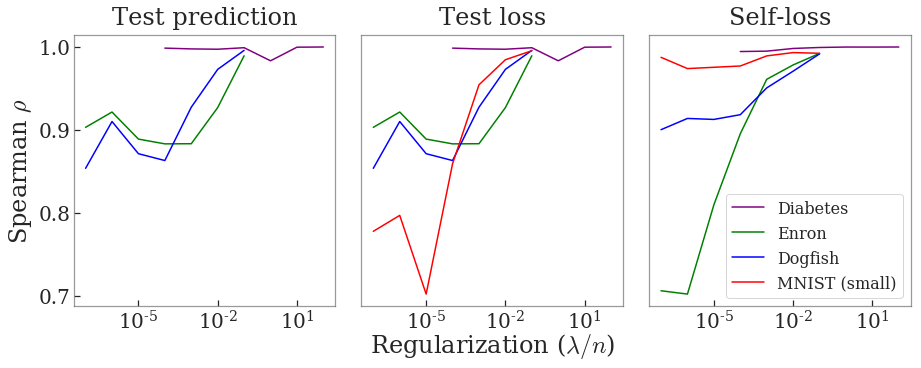

In [27]:
plt.rcParams["axes.grid"] = False

reg_vals = np.logspace(-7,2,10)
colors = ['purple','green','blue','red']
real_names = ['Diabetes', 'Enron', 'Dogfish', 'MNIST (small)']

rows = 1
cols = 3
cell_height, cell_width = 5, 5

fig, ax = plt.subplots(rows, cols,
                       figsize=(cols * cell_width, rows * cell_height),
                       squeeze=False)

regs = [np.logspace(-4,2,7),np.logspace(-7,-1,7),np.logspace(-7,-1,7),np.logspace(-7,-1,7)]
for c in range(cols):
    num_ds = 3 if c == 0 else 4
    for i in range(num_ds):
        where = np.where(spearmans[c][i] != 0)[0]
        ax[0][c].plot(regs[i], spearmans[c][i][where], color=colors[i],\
                     label=real_names[i])
    ax[0][c].set_xscale('log')
    
    ax[0][c].xaxis.set_label_position('top')
    if c != 0:
        ax[0][c].get_yaxis().set_visible(False)
        
    ax[0][c].tick_params(axis='x', bottom=True, direction='in', labelsize=20)
    set_splines_grey(ax[0][c])

ax[0][0].tick_params(axis='y', direction='in', left=True, labelsize=20)
ylmin, ylmax = ax[0][1].get_ylim()
ax[0][0].set_ylim(ylmin, ylmax)
ax[0][1].set_ylim(ylmin, ylmax)

handles, labels = ax[0][2].get_legend_handles_labels()
ax[0][2].legend(handles, labels, prop={'size': 16}, loc='lower right')
ax[0][0].set_xlabel('Test prediction', labelpad=10)
ax[0][1].set_xlabel('Test loss', labelpad=10)
ax[0][2].set_xlabel('Self-loss', labelpad=10)

# X label at bottom
ax[0][1].annotate('Regularization ($\lambda/n$)', fontsize=24,
                  xy=(0.5, -0.2), xycoords='axes fraction',
                  xytext=(0, 0), textcoords='offset points',
                  horizontalalignment='center', verticalalignment='bottom')

ax[0][0].set_ylabel('Spearman $\\rho$')
fig.subplots_adjust(wspace=0.1)

fig.savefig(
    os.path.join(PLOT_DIR, 'paper-regs-spearman.pdf'), 
    dpi=300, bbox_inches='tight')

# Figure 4: Counterexamples

In [28]:
def plot_cross(ax, x, y):
    minX, maxX = np.min(x), np.max(x)
    minY, maxY = np.min(y), np.max(y)
    padX, padY = (maxX - minX) * 0.05, (maxY - minY) * 0.05
    minX, maxX = minX - padX, maxX + padX
    minY, maxY = minY - padY, maxY + padY
    minX, maxX = -20, 20
    minY, maxY = -20, 20
    ax.plot([0, 0],
            [minY, maxY],
            color='grey', alpha=0.5, linewidth=2)
    ax.plot([minX, maxX],
            [0, 0],
            color='grey', alpha=0.5, linewidth=2)

In [29]:
def cex_scatter(ax):
    E = Counterexamples.load_run("gauss4", out_dir=out_dir, verbose=False)
    test_idx = np.nonzero(E.R['cex_tags'] == 'lstsq_uv_K-120_gauss')[0][2]
    subset_subset = E.R['cex_lstsq_uv_K-120_subsets']
    pred = E.R['cex_subset_test_pred_margin_infl'][subset_subset, test_idx]
    newton = E.R['cex_subset_test_newton_pred_margin_infl'][subset_subset, test_idx]

    plot_cross(ax, newton, pred)
    plot_group_correlation(ax, newton, pred, colors=None, size=15)

In [30]:
def cex_cone(ax):
    E = Counterexamples.load_run("ortho2", out_dir=out_dir, verbose=False)
    test_idx = np.nonzero(E.R['cex_tags'] == 'cex_one')[0][0]
    pred = E.R['cex_subset_test_pred_margin_infl'][:, test_idx]
    newton = E.R['cex_subset_test_newton_pred_margin_infl'][:, test_idx]
    
    plot_cross(ax, newton, pred)
    plot_group_correlation(ax, newton, pred, colors=None, size=15)

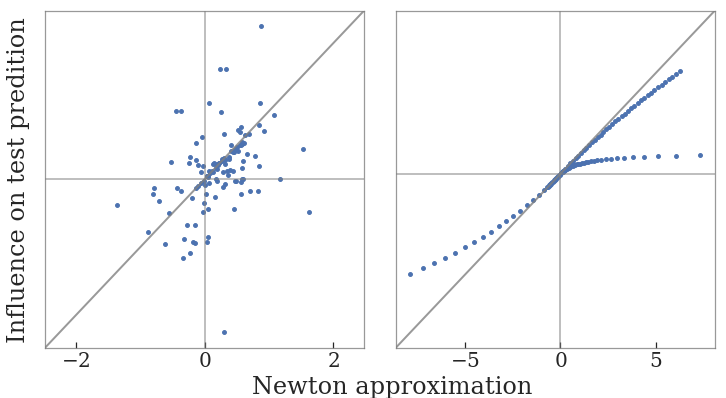

In [31]:
rows = 1
cols = 2
cell_height, cell_width = 6, 6

fig, ax = plt.subplots(rows, cols,
                       figsize=(cols * cell_width, rows * cell_height),
                       squeeze=False)

cex_scatter(ax[0][0])
cex_cone(ax[0][1])

# show min/max for y axis instead of ticks
for r in range(rows):
    for c in range(cols):
        simplify_axis_ticks(ax[r][c], ytick_pad=0.05)

# X labels for the dataset names on top
for c, name in enumerate(['', '']):
    ax[0][c].xaxis.set_label_position('top')
    ax[0][c].set_xlabel(name, labelpad=20)
        
# Y labels on the left
ax[0][0].set_ylabel('Influence on test predition', labelpad=15)

# X label at bottom
ax[0][0].annotate('Newton approximation', fontsize=24,
                  xy=(0.54, 0), xycoords='figure fraction',
                  xytext=(0, 0), textcoords='offset points',
                  horizontalalignment='center', verticalalignment='bottom')

fig.subplots_adjust(wspace=0.1, bottom=0.1)

In [32]:
fig.savefig(
    os.path.join(PLOT_DIR, 'paper-fig4.pdf'), 
    dpi=300, bbox_inches='tight')

# Figure 5: Median Test Point

Retrieving reduced cdr.
Loaded reduced cdr.
Extracting /u/nlp/influence/data/mnist/train-images-idx3-ubyte.gz
Extracting /u/nlp/influence/data/mnist/train-labels-idx1-ubyte.gz
Extracting /u/nlp/influence/data/mnist/t10k-images-idx3-ubyte.gz
Extracting /u/nlp/influence/data/mnist/t10k-labels-idx1-ubyte.gz


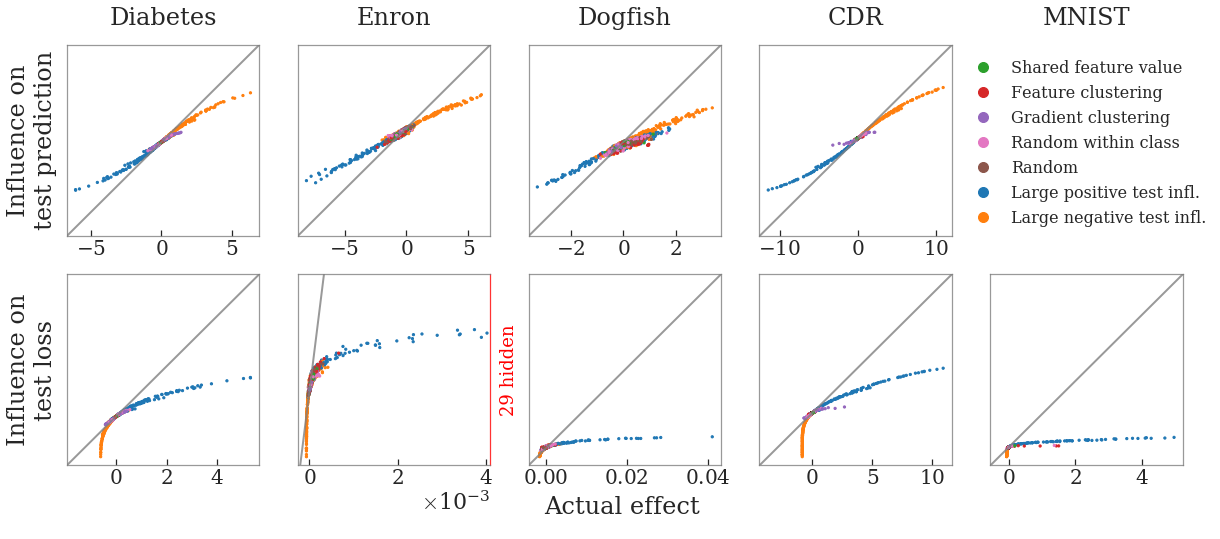

In [33]:
# test margin, test loss, self loss
# but for the median test point
rows = 2
cols = len(dataset_ids_to_plot)
cell_height, cell_width = 4, 4

fig, ax = plt.subplots(rows, cols,
                       figsize=(cols * cell_width, rows * cell_height))

for c, dataset_id in enumerate(dataset_ids_to_plot):
    run_id = dataset_id_to_run_id[dataset_id]
    _out_dir = out_dir
    E = SubsetInfluenceLogreg.load_run(run_id, out_dir=_out_dir,
                                       phase_indices=[2, 5, 7, 8],
                                       verbose=False)
    
    subset_tags = E.get_simple_subset_tags()
    order, subset_tags = tail_first(subset_tags)
    colors = np.array([tag_to_color[tag] for tag in subset_tags])
    
    fixed_test_idx = dataset_id_to_fixed_test_idx_median[dataset_id]
    
    if dataset_id not in ('mnist', 'mnist_small'):
        # test margin
        x = E.R['subset_fixed_test_actl_margin_infl'][:, fixed_test_idx][order]
        y = E.R['subset_fixed_test_pred_margin_infl'][:, fixed_test_idx][order]
        plot_group_correlation(ax[0][c], x, y, colors=colors)
        warn_if_hidden(ax[0][c], x, y)

    # test loss
    x = E.R['subset_fixed_test_actl_infl'][:, fixed_test_idx][order]
    y = E.R['subset_fixed_test_pred_infl'][:, fixed_test_idx][order]
    if dataset_id == 'spam':
        plot_group_correlation(ax[1][c], x, y, colors=colors,
                               equal=False,
                               shrinkx=0.02)
    else:
        plot_group_correlation(ax[1][c], x, y, colors=colors)
    warn_if_hidden(ax[1][c], x, y)

# Hide the mnist test margin square
hide_axis(ax[0][-1])

# show min/max for y axis instead of ticks
for r in range(rows):
    for c in range(cols):
        if r == 0 and c == cols - 1: continue
        simplify_axis_ticks(ax[r][c])

# Y labels on the left
ax[0][0].set_ylabel('Influence on\ntest prediction', labelpad=10)
ax[1][0].set_ylabel('Influence on\ntest loss', labelpad=10)

# X labels for the dataset names on top
for c, dataset_id in enumerate(dataset_ids_to_plot):
    name = dataset_id_to_name[dataset_id]
    ax[0][c].xaxis.set_label_position('top')
    ax[0][c].set_xlabel(name, labelpad=20)

# X label at bottom
ax[1][0].annotate('Actual effect', fontsize=24,
                  xy=(0.51, 0), xycoords='figure fraction',
                  xytext=(0, 20), textcoords='offset points',
                  horizontalalignment='center', verticalalignment='bottom')

# Put a legend on the top right
legend_elements = [ Line2D([0], [0], linewidth=0, marker='o', markersize=10,
                           color=tag_to_color[tag],
                           label=subset_tag_legend[tag])
                    for tag in subset_tag_order ]
ax[0][-1].legend(
    handles=legend_elements,
    loc='upper center', ncol=1, prop={'size': 16},
    frameon=False)

fig.subplots_adjust(wspace=0.2, hspace=0.2, bottom=0.15)

In [34]:
fig.savefig(
    os.path.join(PLOT_DIR, 'paper-fig5.pdf'), 
    dpi=300, bbox_inches='tight')

# Figure 6: pparam, Newton 

Retrieving reduced cdr.
Loaded reduced cdr.
Extracting /u/nlp/influence/data/mnist/train-images-idx3-ubyte.gz
Extracting /u/nlp/influence/data/mnist/train-labels-idx1-ubyte.gz
Extracting /u/nlp/influence/data/mnist/t10k-images-idx3-ubyte.gz
Extracting /u/nlp/influence/data/mnist/t10k-labels-idx1-ubyte.gz


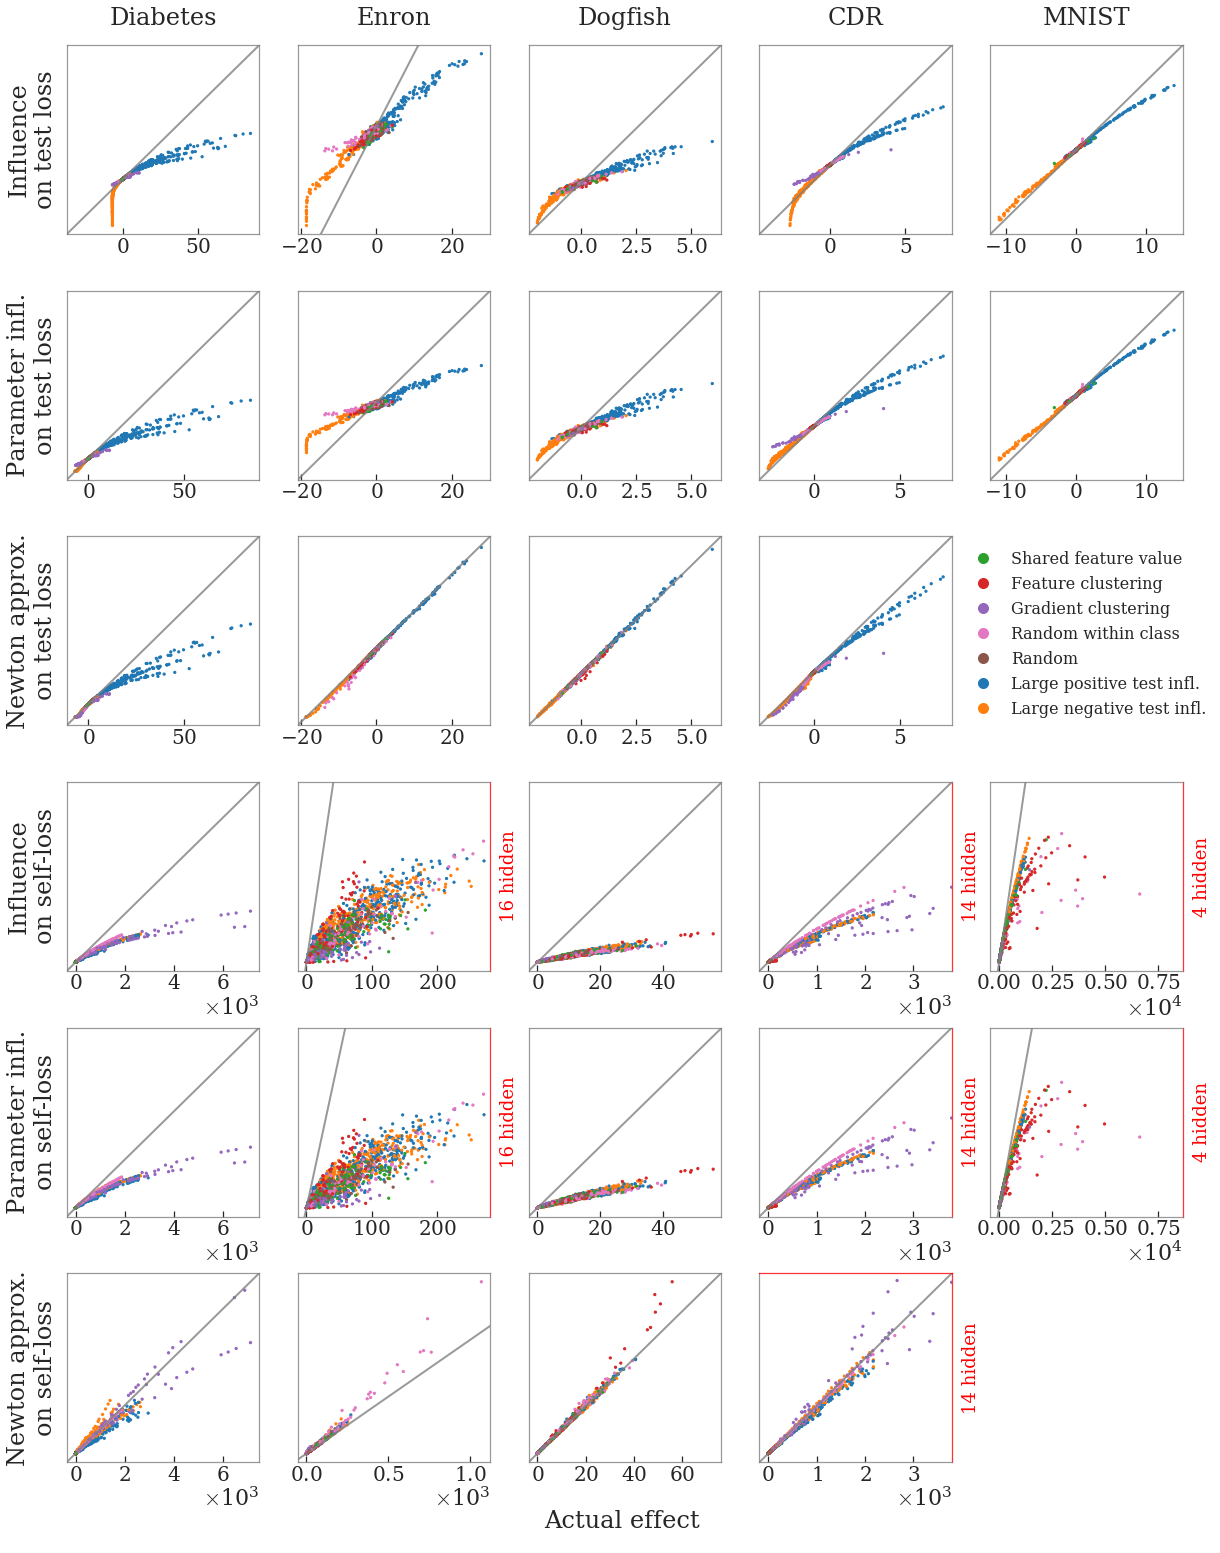

In [35]:
# pred loss, pparam loss, newton loss
# self: pred loss, pparam loss, newton loss
# but for the median test point
rows = 6
cols = len(dataset_ids_to_plot)
cell_height, cell_width = 4, 4

fig, ax = plt.subplots(rows, cols,
                       figsize=(cols * cell_width, rows * cell_height))

for c, dataset_id in enumerate(dataset_ids_to_plot):
    run_id = dataset_id_to_run_id[dataset_id]
    _out_dir = out_dir
    E = SubsetInfluenceLogreg.load_run(run_id, out_dir=_out_dir,
                                       phase_indices=[2, 5, 7, 8, 14],
                                       verbose=False)
    
    subset_tags = E.get_simple_subset_tags()
    order, subset_tags = tail_first(subset_tags)
    colors = np.array([tag_to_color[tag] for tag in subset_tags])
    
    fixed_test_idx = dataset_id_to_fixed_test_idx[dataset_id]
    
    # pred test loss
    x = E.R['subset_fixed_test_actl_infl'][:, fixed_test_idx][order]
    y = E.R['subset_fixed_test_pred_infl'][:, fixed_test_idx][order]
    if dataset_id == 'spam':
        plot_group_correlation(ax[0][c], x, y, colors=colors,
                               equal=False)
    else:
        plot_group_correlation(ax[0][c], x, y, colors=colors)
    warn_if_hidden(ax[0][c], x, y)
    
    # pparam test loss
    x = E.R['subset_fixed_test_actl_infl'][:, fixed_test_idx][order]
    y = E.R['subset_fixed_test_pparam_infl'][:, fixed_test_idx][order]
    plot_group_correlation(ax[1][c], x, y, colors=colors)
    warn_if_hidden(ax[1][c], x, y)
    
    # newton test loss
    if dataset_id != 'mnist':
        x = E.R['subset_fixed_test_actl_infl'][:, fixed_test_idx][order]
        y = E.R['subset_fixed_test_nparam_infl'][:, fixed_test_idx][order]
        plot_group_correlation(ax[2][c], x, y, colors=colors)
        warn_if_hidden(ax[2][c], x, y)
    else:
        hide_axis(ax[2][c])
    
    # pred self loss
    x = E.R['subset_self_actl_infl'][:][order]
    y = E.R['subset_self_pred_infl'][:][order]
    if dataset_id == 'spam':
        plot_group_correlation(ax[3][c], x, y, colors=colors,
                               shrinkx=0.25,
                               equal=False)
    elif dataset_id == 'mnist':
        plot_group_correlation(ax[3][c], x, y, colors=colors,
                               shrinkx=0.15,
                               equal=False)
    elif dataset_id == 'dogfish':
        # TODO: fix the colliding ticks at the bottom in a less gross way
        plot_group_correlation(ax[3][c], x, y, colors=colors)
        xmin, xmax = ax[3][c].get_xlim()
        ax[3][c].set_xlim([xmin, xmax - 0.3])
    elif dataset_id == 'reduced_cdr':
        plot_group_correlation(ax[3][c], x, y, colors=colors,
                               shrinkx=0.35,
                               shrinky=0.35)
    else:
        plot_group_correlation(ax[3][c], x, y, colors=colors)
    warn_if_hidden(ax[3][c], x, y)
    
    # pparam self loss
    x = E.R['subset_self_actl_infl'][:][order]
    y = E.R['subset_self_pparam_infl'][:][order]
    if dataset_id == 'spam':
        plot_group_correlation(ax[4][c], x, y, colors=colors,
                               shrinkx=0.25,
                               equal=False)
    elif dataset_id == 'mnist':
        plot_group_correlation(ax[4][c], x, y, colors=colors,
                               shrinkx=0.15,
                               equal=False)
    elif dataset_id == 'dogfish':
        # TODO: fix the colliding ticks at the bottom in a less gross way
        plot_group_correlation(ax[4][c], x, y, colors=colors)
        xmin, xmax = ax[4][c].get_xlim()
        ax[4][c].set_xlim([xmin, xmax - 0.3])
    elif dataset_id == 'reduced_cdr':
        plot_group_correlation(ax[4][c], x, y, colors=colors,
                               shrinkx=0.35,
                               shrinky=0.35)
    else:
        plot_group_correlation(ax[4][c], x, y, colors=colors)
    warn_if_hidden(ax[4][c], x, y)

    # nparam self loss
    if dataset_id != 'mnist':
        x = E.R['subset_self_actl_infl'][:][order]
        y = E.R['subset_self_nparam_infl'][:][order]
        if dataset_id == 'spam':
            plot_group_correlation(ax[5][c], x, y, colors=colors,
                                   equal=False)
        elif dataset_id == 'reduced_cdr':
            plot_group_correlation(ax[5][c], x, y, colors=colors,
                                   shrinkx=0.35,
                                   shrinky=0.35)
        else:
            plot_group_correlation(ax[5][c], x, y, colors=colors)
        warn_if_hidden(ax[5][c], x, y)
    else:
        hide_axis(ax[5][c])

# show min/max for y axis instead of ticks
for r in range(rows):
    for c in range(cols):
        #if r == 0 and c == cols - 1: continue
        simplify_axis_ticks(ax[r][c])

# Y labels on the left
ax[0][0].set_ylabel('Influence\non test loss', labelpad=10)
ax[1][0].set_ylabel('Parameter infl.\non test loss', labelpad=10)
ax[2][0].set_ylabel('Newton approx.\non test loss', labelpad=10)
ax[3][0].set_ylabel('Influence\non self-loss', labelpad=10)
ax[4][0].set_ylabel('Parameter infl.\non self-loss', labelpad=10)
ax[5][0].set_ylabel('Newton approx.\non self-loss', labelpad=10)

# X labels for the dataset names on top
for c, dataset_id in enumerate(dataset_ids_to_plot):
    name = dataset_id_to_name[dataset_id]
    ax[0][c].xaxis.set_label_position('top')
    ax[0][c].set_xlabel(name, labelpad=20)

# X label at bottom
ax[5][0].annotate('Actual effect', fontsize=24,
                  xy=(0.51, 0), xycoords='figure fraction',
                  xytext=(0, 20), textcoords='offset points',
                  horizontalalignment='center', verticalalignment='bottom')

# Put a legend on the top right
legend_elements = [ Line2D([0], [0], linewidth=0, marker='o', markersize=10,
                           color=tag_to_color[tag],
                           label=subset_tag_legend[tag])
                    for tag in subset_tag_order ]
ax[2][-1].legend(
    handles=legend_elements,
    loc='upper center', ncol=1, prop={'size': 16},
    frameon=False)

fig.subplots_adjust(wspace=0.2, hspace=0.30, bottom=0.06)

In [36]:
fig.savefig(
    os.path.join(PLOT_DIR, 'paper-fig6.pdf'), 
    dpi=300, bbox_inches='tight')

# Supplementary Application Figures

# MNLI: Pred vs Actl on genres

In [37]:
mnli_run_id = 'mnli_2_tf_training-False_sample_weights-False_batch_size-_initial_learning_rate-'

Loading mnli from /u/nlp/influence/data/multinli_1.0/mnli.npz.
Loaded mnli.
Shape of training set: (392702, 600)
Loading nonfires from /u/nlp/influence/data/multinli_1.0/mnli_nonfires.npz.
Loaded mnli nonfires.
Dataset train:
Class 0 is 0.333329089233 of the dataset.
Class 1 is 0.333331635693 of the dataset.
Class 2 is 0.333339275074 of the dataset.
Dataset test:
Class 0 is 0.354457463067 of the dataset.
Class 1 is 0.318186449312 of the dataset.
Class 2 is 0.327356087621 of the dataset.
Dataset nonfires:
Class 0 is 0.352217249797 of the dataset.
Class 1 is 0.318246541904 of the dataset.
Class 2 is 0.329536208299 of the dataset.


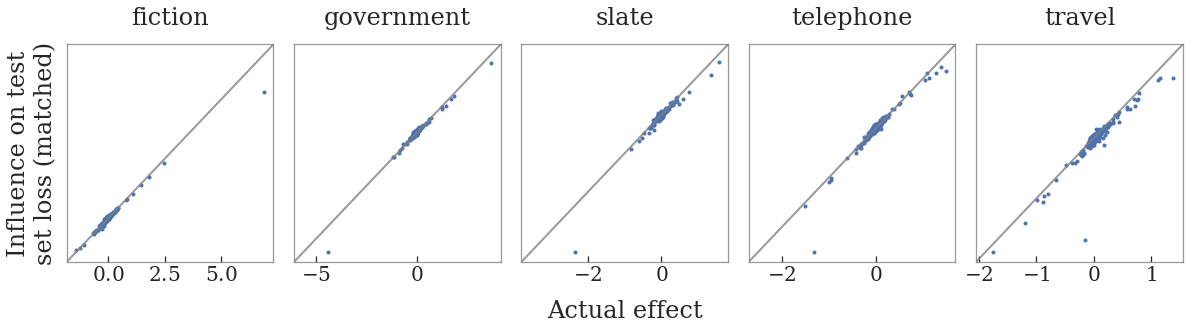

[[0.85512095 0.77097691 0.77513075 0.80246248 0.80582837]]


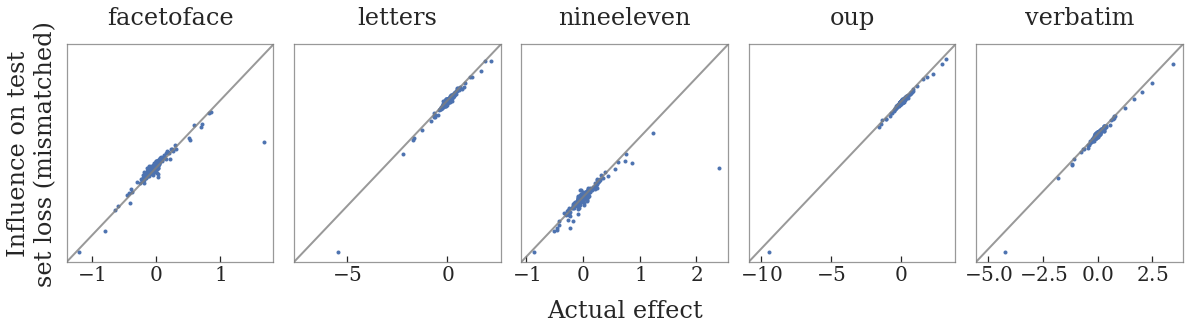

[[0.76510262 0.86016597 0.79281005 0.85255547 0.80111008]]


In [38]:
E = CreditAssignment.load_run(mnli_run_id, out_dir=out_dir,
                              phase_indices=[4, 5, 8], verbose=False)

mask = range(len(E.R['subset_tags'])-5) # exclude genres; turkers only
datasets = ['test', 'nonfires']
alt_names = ['matched', 'mismatched']

for ds, alt_ds in zip(datasets, alt_names):
    rows = 1
    cols = 5
    cell_height, cell_width = 4, 4

    fig, ax = plt.subplots(rows, cols,
                           figsize=(cols * cell_width, rows * cell_height),
                           squeeze=False)
    
    spearmans = np.zeros((rows, cols),dtype=float)
    
    genres = E.R['{}_genres'.format(ds)]
    
    for c in range(cols):
        genre = genres[c]
        x = E.R['{}_{}_actl_infl'.format(genre, ds)][mask]
        y = E.R['{}_{}_pred_infl'.format(genre, ds)][mask]
        spearmans[0][c] = plot_group_correlation(ax[0][c], x, y, legend=False, size=9)
        warn_if_hidden(ax[0][c], x, y)

    # show min/max for y axis instead of ticks
    fig.canvas.draw() # necessary to force tick labels to be populated
    for c in range(cols):
        simplify_axis_ticks(ax[0][c])

    # Y labels on the left
    ax[0][0].set_ylabel('Influence on test\nset loss ({})'.format(alt_ds), labelpad=10)

    # X labels for the genre names on top
    for c, genre in enumerate(genres):
        ax[0][c].xaxis.set_label_position('top')
        ax[0][c].set_xlabel(genre, labelpad=20)

    # X label at bottom
    ax[-1][2].annotate('Actual effect', fontsize=24,
                      xy=(0.5, 0), xycoords='axes fraction',
                      xytext=(0, -60), textcoords='offset points',
                      horizontalalignment='center', verticalalignment='bottom')

    fig.subplots_adjust(wspace=0.1)
    fig.savefig(
        os.path.join(PLOT_DIR, 'paper-suppfig-mnli-acc-{}.pdf'.format(ds)), 
        dpi=300, bbox_inches='tight')
    plt.show()
    print(spearmans)

# MNLI: Size doesn't correlate

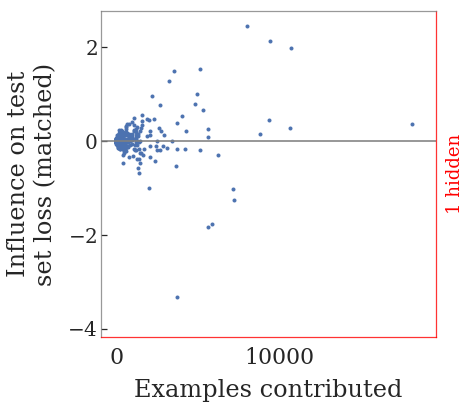

In [39]:
rows = 1
cols = 1
cell_height, cell_width = 6, 6

fig, ax = plt.subplots(rows, cols,
                       figsize=(cols * cell_width, rows * cell_height),
                       squeeze=False)

subset_indices = E.R['subset_indices'][mask]
x = [len(ind) for ind in subset_indices]
y = E.R['all_test_pred_infl'][mask]

plot_group_correlation(ax[0][0], x, y, legend=False, size=9, equal=False, diagonal=False,\
                       shrinkx=0.5, shrinky=0.6, shrinky_anchor='max', show_x_axis=True, scientific=False)
warn_if_hidden(ax[0][0], x, y)
ax[0][0].tick_params(axis='y', direction='in', left=True, labelsize=20)

# Y labels on the left
ax[0][0].set_ylabel('Influence on test\nset loss (matched)', labelpad=10)

ax[0][0].set_xlabel('Examples contributed', labelpad=10)

fig.subplots_adjust(wspace=0.1)
fig.savefig(
    os.path.join(PLOT_DIR, 'paper-suppfig-mnli-size.pdf'), 
    dpi=300, bbox_inches='tight')

plt.show()

# MNLI: Genre effect

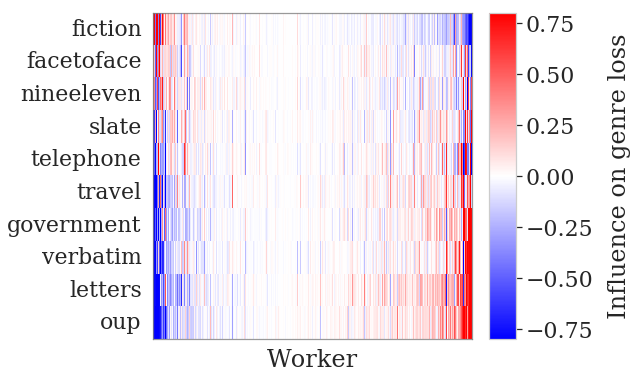

In [40]:
rows = 1
cols = 1
cell_height, cell_width = 6, 6

widths = [cell_width] * cols + [0.5]
heights = [cell_height]
gs_kw = dict(width_ratios=widths, height_ratios=heights)
fig, ax = plt.subplots(ncols=len(widths), nrows=len(heights),
                       gridspec_kw=gs_kw, squeeze=False,
                       figsize=(sum(widths), sum(heights)))

genre_by_num = list(E.R['test_genres'])+list(E.R['nonfires_genres'])
datasets = ['test', 'nonfires']
infl_matrix = np.array([E.R['{}_{}_pred_infl'.format(genre, datasets[i//5])][mask]\
                        for i, genre in enumerate(genre_by_num)])
#avg_magnitudes = np.mean(np.abs(infl_matrix), axis=0)
#turker_order = np.argsort(infl_matrix[0])
turker_order = np.argsort(np.mean(infl_matrix[[9,1,4,6,8]], axis=0))
genre_order = [0,5,7,2,3,4,1,9,6,8]
infl_matrix = infl_matrix[:, turker_order]
infl_matrix = infl_matrix[genre_order]

ax[0][0].imshow(infl_matrix, cmap='bwr', vmin=-0.8, vmax=0.8, interpolation='nearest', aspect='auto')

# Hide original labels
for label in ax[0][0].get_yticklabels():
    label.set_visible(False)
ax[0][0].yaxis.offsetText.set_visible(False)
for label in ax[0][0].get_xticklabels():
    label.set_visible(False)
ax[0][0].xaxis.offsetText.set_visible(False)

# Label genres
ymin, ymax = ax[0][0].get_ylim()
for i, genre in enumerate(np.array(genre_by_num)[genre_order]):
    ax[0][0].annotate(genre, fontsize=22, xy=(-.02, 1-(i+1)/float(len(genre_by_num))), xycoords='axes fraction',
                xytext=(-5, 5), textcoords='offset points',
                horizontalalignment='right', verticalalignment='bottom')
ax[0][0].set_xlabel('Worker', labelpad=10)

# colorbar
norm = mpl.colors.Normalize(vmin=-0.8, vmax=0.8)
sm = plt.cm.ScalarMappable(cmap='bwr', norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax[0][-2], cax=ax[0][-1])
cb.set_label('Influence on genre loss', labelpad=15)
cb.set_ticks(np.linspace(-1,1,9))

fig.subplots_adjust(wspace=0.1)

set_splines_grey(ax[0][0])

# Axes are worker numbers and genre names
fig.savefig(
    os.path.join(PLOT_DIR, 'paper-suppfig-mnli-genre-effect.pdf'), 
    dpi=300, bbox_inches='tight')

# MNLI: Contributing to genre doesn't correlate w infl on genre

Loading mnli genres from /u/nlp/influence/data/multinli_1.0/mnli_genres.npz.
Loaded mnli genres.


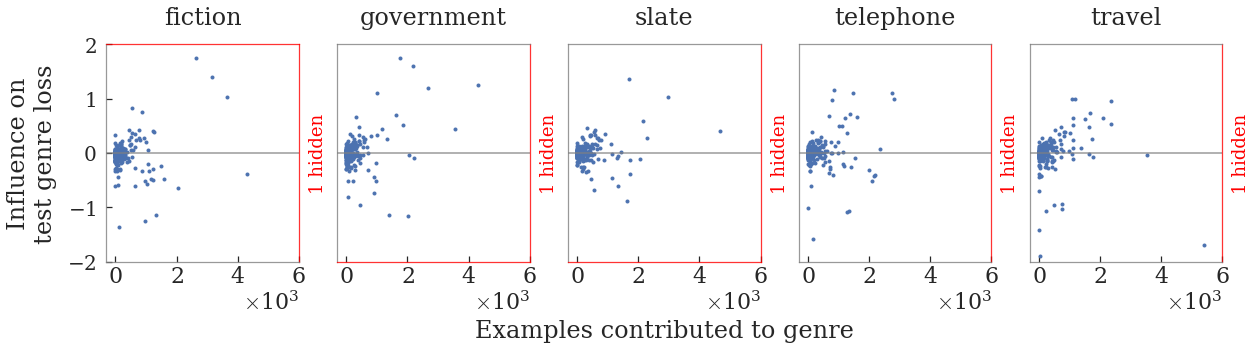

In [41]:
rows = 1
cols = 5
cell_height, cell_width = 4, 4

fig, ax = plt.subplots(rows, cols,
                       figsize=(cols * cell_width, rows * cell_height),
                       squeeze=False)

genres = E.R['test_genres']

from datasets.mnli import load_mnli_genres
num_groups = len(mask)
train_genres = load_mnli_genres('/u/nlp/influence/data/')[0]
gens, inverse = np.unique(train_genres, return_inverse=True)
genre_contribs = np.zeros((num_groups, 5), dtype=int)
for i in range(num_groups):
    for j in subset_indices[i]:
        genre_contribs[i][inverse[j]] += 1
genre_contribs = np.array(genre_contribs)

for c in range(cols):
    genre = genres[c]
    x = genre_contribs[mask, c]
    y = E.R['{}_test_pred_infl'.format(genre)][mask]
    if c == 0:
        plot_group_correlation(ax[0][c], x, y, legend=False, size=9, equal=False,\
                               diagonal=False, shrinkx=0.7, shrinky=0.7)
    elif c in [1,2]:
        plot_group_correlation(ax[0][c], x, y, legend=False, size=9, equal=False,\
                               diagonal=False, shrinkx=0.7, shrinky=0.55, shrinky_anchor='max')
    else:
        plot_group_correlation(ax[0][c], x, y, legend=False, size=9, equal=False,\
                               diagonal=False, shrinkx=0.7)
    warn_if_hidden(ax[0][c], x, y)
    ax[0][c].set_ylim((-2,2))
    ax[0][c].set_xlim((-300,6000))
    ax[0][c].plot([-300,6000],[0,0],color='grey',alpha=0.8)
    if c != 0:
        ax[0][c].set_yticks([])

# show min/max for y axis instead of ticks
for c in range(cols):
    ax[0][c].grid(False)
    ax[0][c].tick_params(axis='x', bottom=True, direction='in')

# Y labels on the left
ax[0][0].set_ylabel('Influence on\ntest genre loss', labelpad=10)

ax[0][0].tick_params(axis='y', direction='in', left=True, labelsize=20, pad=10)

# X labels for the genre names on top
for c, genre in enumerate(genres):
    ax[0][c].xaxis.set_label_position('top')
    ax[0][c].set_xlabel(genre, labelpad=20)

# X label at bottom
ax[-1][2].annotate('Examples contributed to genre', fontsize=24,
                  xy=(0.5, 0), xycoords='axes fraction',
                  xytext=(0, -80), textcoords='offset points',
                  horizontalalignment='center', verticalalignment='bottom')

fig.subplots_adjust(wspace=0.2)
fig.savefig(
    os.path.join(PLOT_DIR, 'paper-suppfig-mnli-genre-contrib.pdf'.format(ds)), 
    dpi=300, bbox_inches='tight')
plt.show()

# Babble CDR: Pred vs Actl on Pos/Neg Test

In [42]:
babble_run_id = 'reduced_cdr_sample_weights-True'

Retrieving reduced cdr.
Loaded reduced cdr.
Loading cdr weights from /u/nlp/influence/data/babble/cdr_weights.npz.
Loaded cdr weights.
Retrieving reduced cdr nonfires.
Loaded reduced cdr nonfires.
Retrieving cdr labeling info.


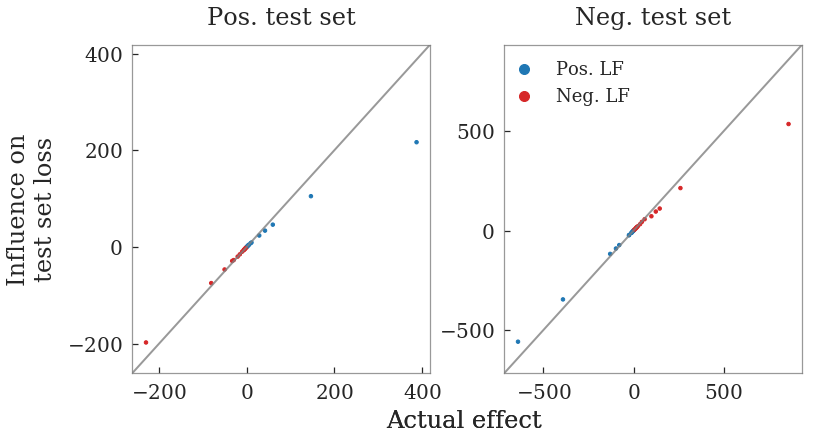

[[1. 1.]]


In [43]:
E = DataValuation.load_run(babble_run_id, out_dir=out_dir,
                              phase_indices=[4, 5, 8], verbose=False)
subset_tags = E.R['subset_tags']
mask = np.where(E.R['subset_tags'] == 'same_features')[0]
num_groups = len(mask)

from datasets.babble import load_cdr_labeling_info
LF_labels, gold_labels = load_cdr_labeling_info(data_dir='/u/nlp/influence/data/')
ex_id_to_gold = dict(zip(gold_labels[:,1],gold_labels[:,0]))
ex_id_to_LF_lab = [dict(zip(LF_labels[np.where(LF_labels[:,2]==i)[0],1],
                           LF_labels[np.where(LF_labels[:,2]==i)[0],0])) for i in range(1,num_groups+1)]
accs = []
class_pos, class_neg = [], []
for i in range(num_groups):
    y_pred, y_true = [], []
    for key, val in ex_id_to_LF_lab[i].iteritems():
        y_pred.append(val)
        y_true.append(ex_id_to_gold[key])
    if y_pred[0] > 0: class_pos.append(i)
    else: class_neg.append(i)
    accs.append(sum(np.array(y_true) == np.array(y_pred))/float(len(y_true)))
accs = np.array(accs)

subset_colors_2= tag_to_color['pos_tail_test'], tag_to_color['same_features']
colors = np.zeros((num_groups, 4))
colors[class_pos] = subset_colors_2[0]
colors[class_neg] = subset_colors_2[1]

datasets = ['pos_test', 'neg_test']
alt_names = ['Pos. test set', 'Neg. test set']

rows = 1
cols = 2
cell_height, cell_width = 6, 6

fig, ax = plt.subplots(rows, cols,
                       figsize=(cols * cell_width, rows * cell_height),
                       squeeze=False)

spearmans = np.zeros((rows,cols),dtype=float)

for c in range(cols):
    ds, alt_ds = datasets[c], alt_names[c]

    x = E.R['subset_{}_actl_infl'.format(ds)][mask]
    y = E.R['subset_{}_pred_infl'.format(ds)][mask]
    spearmans[0][c] = plot_group_correlation(ax[0][c], x, y, size=12, colors=colors, scientific=False)
    warn_if_hidden(ax[0][c], x, y)

    # X labels for the genre names on top
    ax[0][c].xaxis.set_label_position('top')
    ax[0][c].set_xlabel(alt_ds, labelpad=20)

    # X label at bottom
    ax[0][0].annotate('Actual effect', fontsize=24,
                  xy=(0.57, 0), xycoords='figure fraction',
                  xytext=(0, 0), textcoords='offset points',
                  horizontalalignment='center', verticalalignment='bottom')
    
    ax[0][c].tick_params(axis='y', direction='in', left=True, labelsize=20, pad=10)
    ax[0][c].tick_params(axis='x', direction='in', bottom=True, labelsize=20, pad=10)

# Put a legend on the top right
legend_elements = [ Line2D([0], [0], linewidth=0, marker='o', markersize=10,
                           color=color,
                           label=lab)
                    for lab, color in zip(['Pos. LF', 'Neg. LF'], subset_colors_2)]
ax[0][-1].legend(
    handles=legend_elements,
    loc='upper left', ncol=1, prop={'size': 18},
    bbox_to_anchor=(-0.05, 1.0),
    frameon=False)
    
# Y labels on the left
ax[0][0].set_ylabel('Influence on\ntest set loss', labelpad=10)

fig.subplots_adjust(wspace=0.25, bottom=0.12)
fig.savefig(
    os.path.join(PLOT_DIR, 'paper-suppfig-babble-acc-test.pdf'), 
    dpi=300, bbox_inches='tight')
plt.show()
print(spearmans)

# Babble CDR: Size correlates, Acc doesn't

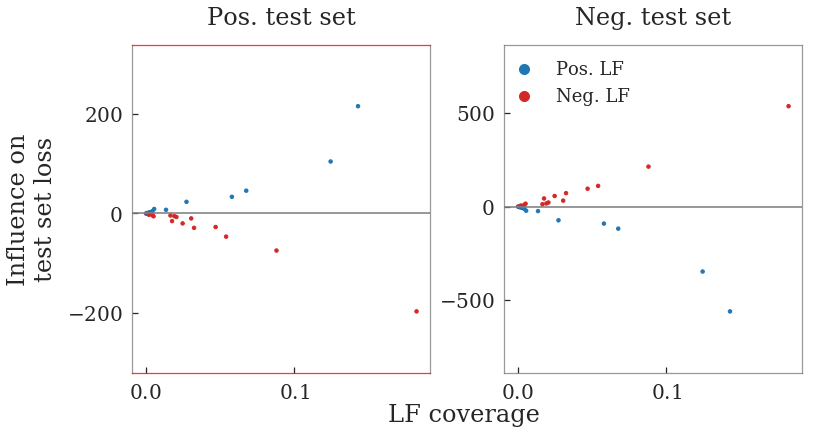

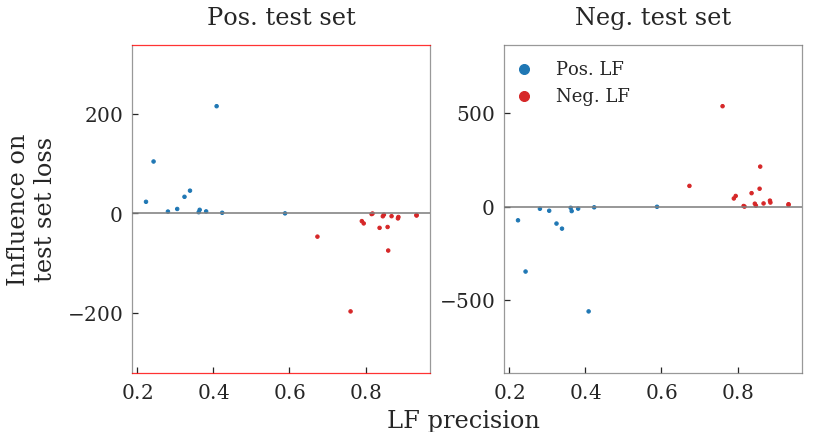

In [44]:
subset_indices = E.R['subset_indices'][mask]
sizes = [len(ind) for ind in subset_indices]

metas = [np.array(sizes)/float(np.sum(sizes)), accs]
meta_names = ['LF coverage', 'LF precision']
save_names = ['sizes', 'accs']

for i in range(2):
    data = metas[i]
    name = meta_names[i]
    save_name = save_names[i]
    
    rows = 1
    cols = 2
    cell_height, cell_width = 6, 6

    fig, ax = plt.subplots(rows, cols,
                           figsize=(cols * cell_width, rows * cell_height),
                           squeeze=False)
    
    for c in range(cols):
        x = data
        y = E.R['subset_{}_pred_infl'.format(datasets[c])][mask]

        plot_group_correlation(ax[0][c], x, y, legend=False, size=12, show_x_axis=True,\
                               equal=False, diagonal=False, colors=colors, pady=0.3, scientific=False)
        warn_if_hidden(ax[0][0], x, y)

        # X labels for the pos/neg names on top
        ax[0][c].xaxis.set_label_position('top')
        ax[0][c].set_xlabel(alt_names[c], labelpad=20)
        
        ax[0][c].tick_params(axis='y', direction='in', left=True, labelsize=20, pad=10)
        ax[0][c].tick_params(axis='x', direction='in', bottom=True, labelsize=20, pad=10)
    
    # Put a legend on the top right
    legend_elements = [ Line2D([0], [0], linewidth=0, marker='o', markersize=10,
                               color=color,
                               label=lab)
                        for lab, color in zip(['Pos. LF', 'Neg. LF'], subset_colors_2)]
    ax[0][-1].legend(
        handles=legend_elements,
        loc='upper left', ncol=1, prop={'size': 18},
        bbox_to_anchor=(-0.05, 1.0),
        frameon=False)
    
    # Y labels on the left
    ax[0][0].set_ylabel('Influence on\ntest set loss', labelpad=10)
    
    # X label at bottom
    ax[-1][0].annotate(name, fontsize=24,
                  xy=(0.57, 0), xycoords='figure fraction',
                  xytext=(0, 3 if i == 0 else 0), textcoords='offset points',
                  horizontalalignment='center', verticalalignment='bottom')

    fig.subplots_adjust(wspace=0.25, bottom=0.12)
    fig.savefig(
        os.path.join(PLOT_DIR, 'paper-suppfig-babble-{}.pdf'.format(save_name)), 
        dpi=300, bbox_inches='tight')
    plt.show()

# Combined Application Figures

Loading mnli from /u/nlp/influence/data/multinli_1.0/mnli.npz.
Loaded mnli.
Shape of training set: (392702, 600)
Loading nonfires from /u/nlp/influence/data/multinli_1.0/mnli_nonfires.npz.
Loaded mnli nonfires.
Dataset train:
Class 0 is 0.333329089233 of the dataset.
Class 1 is 0.333331635693 of the dataset.
Class 2 is 0.333339275074 of the dataset.
Dataset test:
Class 0 is 0.354457463067 of the dataset.
Class 1 is 0.318186449312 of the dataset.
Class 2 is 0.327356087621 of the dataset.
Dataset nonfires:
Class 0 is 0.352217249797 of the dataset.
Class 1 is 0.318246541904 of the dataset.
Class 2 is 0.329536208299 of the dataset.


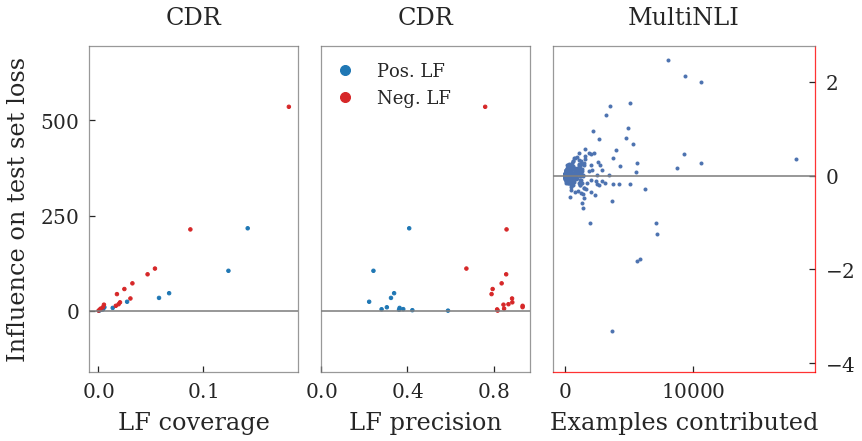

In [45]:
rows = 1
cols = 3
cell_height, cell_width = 6, 4

widths = [4,4,5]
heights = [6]
gs_kw = dict(width_ratios=widths, height_ratios=heights)
fig, ax = plt.subplots(ncols=len(widths), nrows=len(heights),
                       gridspec_kw=gs_kw, squeeze=False,
                       figsize=(sum(widths), sum(heights)))

colors = [subset_colors_2[0] for i in range(len(class_pos))] + [subset_colors_2[1] for i in range(len(class_neg))]

for c in range(2):
    name = meta_names[c]
    x = np.concatenate((np.array(metas[c])[class_pos], np.array(metas[c])[class_neg]))
    y = np.concatenate((E.R['subset_pos_test_pred_infl'][mask][class_pos],
                        E.R['subset_neg_test_pred_infl'][mask][class_neg]))
    plot_group_correlation(ax[0][c], x, y, legend=False, size=12, show_x_axis=True,\
                               equal=False, diagonal=False, pady=0.3, colors=colors)
    warn_if_hidden(ax[0][c], x, y)

    # X label
    ax[0][c].set_xlabel(name, labelpad=10)
    if c == 1:
        ax[0][c].get_yaxis().set_visible(False)
        
    ax[0][c].tick_params(axis='y', direction='in', left=True, labelsize=20, pad=10)
    ax[0][c].tick_params(axis='x', direction='in', bottom=True, labelsize=20, pad=10)

# Put a legend on the top left
legend_elements = [ Line2D([0], [0], linewidth=0, marker='o', markersize=10,
                           color=color,
                           label=lab)
                    for lab, color in zip(['Pos. LF', 'Neg. LF'], subset_colors_2)]
ax[0][1].legend(
    handles=legend_elements,
    loc='upper left', ncol=1, prop={'size': 18},
    bbox_to_anchor=(-0.05, 1.0),
    frameon=False)

# Y labels on the left
ax[0][0].set_ylabel('Influence on test set loss', labelpad=10)

E2 = CreditAssignment.load_run(mnli_run_id, out_dir=out_dir,
                              phase_indices=[4, 5, 8], verbose=False)
mask = range(len(E2.R['subset_tags'])-5) # exclude genres; turkers only

subset_indices = E2.R['subset_indices'][mask]
x = [len(ind) for ind in subset_indices]
y = E2.R['all_test_pred_infl'][mask]

plot_group_correlation(ax[0][2], x, y, legend=False, size=9, equal=False, diagonal=False,\
                       shrinkx=0.5, shrinky=0.6, shrinky_anchor='max', show_x_axis=True, scientific=False)
warn_if_hidden(ax[0][2], x, y, count_hidden=False)

ax[0][1].set_xticks(ax[0][1].get_xticks()[::2])

ax[0][2].tick_params(axis='y', direction='in', right=True, labelleft=False, labelright=True, labelsize=20, pad=10)
ax[0][2].tick_params(axis='x', direction='in', bottom=True, labelsize=20, pad=10)
ax[0][2].set_xlabel('Examples contributed', labelpad=10)

# X labels for the pos/neg names on top
ax[-1][0].annotate('CDR', fontsize=24,
              xy=(0.5, 1.05), xycoords='axes fraction',
              xytext=(0, 0), textcoords='offset points',
              horizontalalignment='center', verticalalignment='bottom')
ax[-1][1].annotate('CDR', fontsize=24,
              xy=(0.5, 1.05), xycoords='axes fraction',
              xytext=(0, 0), textcoords='offset points',
              horizontalalignment='center', verticalalignment='bottom')
ax[-1][2].annotate('MultiNLI', fontsize=24,
              xy=(0.5, 1.05), xycoords='axes fraction',
              xytext=(0, 0), textcoords='offset points',
              horizontalalignment='center', verticalalignment='bottom')

fig.subplots_adjust(wspace=0.1)
fig.savefig(
    os.path.join(PLOT_DIR, 'paper-combined-apps.pdf'), 
    dpi=300, bbox_inches='tight')

plt.show()